In [28]:
import tensorflow as tf
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

def load_and_preprocess_data(data_dir):
    # Read the images and labels from the data directory
    train_images = []
    train_labels = []
    for subdir, _, files in os.walk(data_dir):
        for filename in files:
            if filename.endswith(".bmp") or filename.endswith(".tiff"): 
                image_path = os.path.join(subdir, filename)
                image = load_image(image_path) 
                label = os.path.basename(subdir)  # Use subdirectory name as label
                train_images.append(image)
                train_labels.append(label)
    
    # Convert lists to numpy arrays
    train_images = np.array(train_images)
    train_labels = np.array(train_labels)
    
    # Perform preprocessing on the images and labels
    train_images = preprocess_images(train_images)  # Replace with actual code to preprocess images
    train_labels = preprocess_labels(train_labels)  # Replace with actual code to preprocess labels
    
    return train_images, train_labels

def load_image(image_path):
    image = cv2.imread(image_path)  # Load the image using OpenCV
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert the image to grayscale
    image = cv2.resize(image, (28, 28))  # Resize the image to 28x28 pixels
    image = image.astype('float32') / 255.0  # Normalize the image values between 0 and 1
    image = np.expand_dims(image, axis=-1)  # Add a channel dimension to the image
    return image

def preprocess_images(images):
    images = np.array(images)  # Convert the input images to a NumPy array
    images = images.astype('float32') / 255.0  # Normalize the pixel values between 0 and 1
    images = np.expand_dims(images, axis=-1)  # Add a channel dimension to the images
    return images

def preprocess_labels(labels):
    labels = np.array(labels)  # Convert the input labels to a NumPy array
    labels = labels.astype('int64')  # Convert the label data type to int64
    return labels

def get_label_from_filename(filename):
    label_str = filename.split(".")[0]
    label = int(label_str)
    return label


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
train_images, train_labels = load_and_preprocess_data("/content/drive/My Drive/Colab Notebooks/Sem 2/Machine Learning/Assignment 2/Problem 2/train/")  # Replace with actual code to load and preprocess data
train_images.shape


(1000, 28, 28, 1, 1)

In [30]:
test_images, test_labels = load_and_preprocess_data("/content/drive/My Drive/Colab Notebooks/Sem 2/Machine Learning/Assignment 2/Problem 2/val/")  # Replace with actual code to load and preprocess data
test_images.shape


(178, 28, 28, 1, 1)

In [31]:
import tensorflow as tf

class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.flatten = tf.keras.layers.Flatten(input_shape=(28, 28))
        self.dense1 = tf.keras.layers.Dense(128, activation='relu')
        self.dense2 = tf.keras.layers.Dense(10, activation='softmax')

    def call(self, inputs):
        x = self.flatten(inputs)
        x = self.dense1(x)
        return self.dense2(x)


In [32]:

# Define the model architecture

model = MyModel()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

train_his = model.fit(train_images, train_labels, epochs=200, batch_size=32)



Epoch 1/200
32/32 [==============================] - 1s 5ms/step - loss: 2.2921 - accuracy: 0.2220
Epoch 2/200
32/32 [==============================] - 0s 5ms/step - loss: 2.2598 - accuracy: 0.5590
Epoch 3/200
32/32 [==============================] - 0s 5ms/step - loss: 2.2150 - accuracy: 0.5330
Epoch 4/200
32/32 [==============================] - 0s 4ms/step - loss: 2.1545 - accuracy: 0.6170
Epoch 5/200
32/32 [==============================] - 0s 5ms/step - loss: 2.0741 - accuracy: 0.6950
Epoch 6/200
32/32 [==============================] - 0s 4ms/step - loss: 1.9754 - accuracy: 0.7420
Epoch 7/200
32/32 [==============================] - 0s 4ms/step - loss: 1.8615 - accuracy: 0.7890
Epoch 8/200
32/32 [==============================] - 0s 4ms/step - loss: 1.7370 - accuracy: 0.8000
Epoch 9/200
32/32 [==============================] - 0s 4ms/step - loss: 1.6104 - accuracy: 0.8210
Epoch 10/200
32/32 [==============================] - 0s 5ms/step - loss: 1.4879 - accuracy: 0.8160
Epoch 11/

In [33]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

6/6 [==============================] - 0s 4ms/step - loss: 0.1768 - accuracy: 0.9551


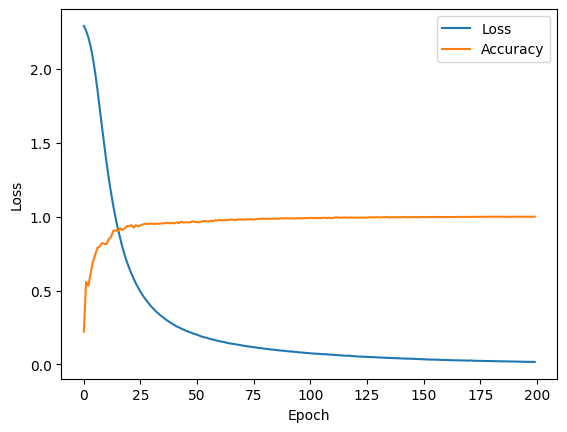

In [34]:
# Plot the loss
plt.plot(train_his.history['loss'], label='Loss')
plt.plot(train_his.history['accuracy'], label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
pred_image = model.predict(test_images)
print('Actual value: ', test_labels[0])
print('Predicted Value: ', np.argmax(pred_image[0]))

6/6 [==============================] - 0s 2ms/step
Actual value:  3
Predicted Value:  3
